In [5]:
#profitableHospital-project - KNN Model

In [6]:
#dependencies
import pandas as pd

import requests
import json
from config import gkey

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

import tensorflow
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import joblib

In [7]:
#Main File Read
df = pd.read_csv("targetedCO2017.csv")
df.head()

,Provider CCN,Hospital Name,Street Address,City,State Code,Zip Code,CON,Urban,Inpatient %,Outpatient %,...,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE,Net Income %,Net Income Score
0,510013,REYNOLDS MEMORIAL HOSPITAL,800 WHEELING AVENUE,GLEN DALE,WV,26038,1.0,1.0,0.311881,0.688119,...,0.003080,19670.239080,122236.485714,1328.657453,26564.899100,6.214286,0.067547,6.214286,0.308395,1
1,340106,SANDHILLS REGIONAL MEDICAL CENTER,1000 WEST HAMLET AVE,HAMLET,NC,28345,1.0,2.0,0.325730,0.674270,...,0.001075,16873.362245,51674.671875,847.125768,121408.920705,3.062500,0.050205,3.062500,-0.337043,3
2,110003,MAYO CLINIC HEALTH SYSTEM WAYCROSS,1900 TEBEAU STREET,WAYCROSS,GA,31501,1.0,2.0,0.391293,0.608707,...,0.016794,22079.254976,300562.761290,2504.689677,50452.385233,13.612903,0.113441,13.612903,-0.132444,3
3,250025,GILMORE MEMORIAL REGIONAL MEDICAL CE,1105 EARL FRYE BLVD,AMORY,MS,38821,1.0,2.0,0.364763,0.635237,...,0.000905,15444.529412,132660.378947,1105.503158,52406.586826,8.589474,0.071579,8.589474,-0.132426,3
4,160001,UNITYPOINT HEALTH-MARSHALLTOWN,3 SOUTH 4TH AVENUE,MARSHALLTOWN,IA,50158,1.0,2.0,0.276917,0.723083,...,0.000780,29768.443038,383952.163265,3199.601361,49737.365833,12.897959,0.107483,12.897959,-0.291462,3


In [8]:
#Features File Read
features = pd.read_csv("featuresCO2017.csv")
features.head()

,CON,Urban,Inpatient %,Outpatient %,Charity %,Uncompensated %,Rev Per Discharge,Rev Per Bed,Rev Per Bed Days,Rev Per FTE,Discharges Per Bed,Discharges Per Bed Days,Discharges Per FTE
0,1.0,1.0,0.311881,0.688119,0.003080,0.003080,19670.239080,122236.485714,1328.657453,26564.899100,6.214286,0.067547,6.214286
1,1.0,2.0,0.325730,0.674270,0.001075,0.001075,16873.362245,51674.671875,847.125768,121408.920705,3.062500,0.050205,3.062500
2,1.0,2.0,0.391293,0.608707,0.016794,0.016794,22079.254976,300562.761290,2504.689677,50452.385233,13.612903,0.113441,13.612903
3,1.0,2.0,0.364763,0.635237,0.000905,0.000905,15444.529412,132660.378947,1105.503158,52406.586826,8.589474,0.071579,8.589474
4,1.0,2.0,0.276917,0.723083,0.000780,0.000780,29768.443038,383952.163265,3199.601361,49737.365833,12.897959,0.107483,12.897959


In [10]:
y = df[['Net Income Score']]

In [11]:
X = features

In [12]:
#Create a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [13]:
y_train.shape

(2275, 1)

In [14]:
X_train.shape

(2275, 13)

In [15]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 1, Train/Test Score: 1.000/0.453
k: 3, Train/Test Score: 0.686/0.458


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 5, Train/Test Score: 0.629/0.481
k: 7, Train/Test Score: 0.616/0.480


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 9, Train/Test Score: 0.596/0.490
k: 11, Train/Test Score: 0.598/0.502


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 13, Train/Test Score: 0.584/0.497
k: 15, Train/Test Score: 0.581/0.509


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k: 17, Train/Test Score: 0.582/0.513
k: 19, Train/Test Score: 0.578/0.519


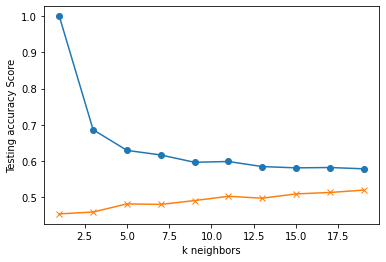

In [16]:
# Create the for loop and KNN model
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [17]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.509


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [18]:
# Review a range of K values for most efficient accuracy
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.480


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [19]:
# Create the KNN model for GridSearchCV enhancement
#from sklearn.svm import SVC 
modelc = KNeighborsClassifier(n_neighbors=11)
modelc

KNeighborsClassifier(n_neighbors=11)

In [20]:
# Train the model with GridSearch
param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [15, 20, 30]}
gridc = GridSearchCV(modelc, param_grid, verbose=3)

In [21]:
gridc.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=15; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 3/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 2/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 3/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 4/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s
[CV 5/5] END ..............algorithm=ball_tree, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 1/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=15; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 4/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=20; total time=   0.0s
[CV 1/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 2/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 3/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 4/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s
[CV 5/5] END ................algorithm=kd_tree, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

[CV 1/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=15; total time=   0.0s
[CV 1/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s

C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when


[CV 2/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=20; total time=   0.0s
[CV 1/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 2/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 3/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 4/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s
[CV 5/5] END ..................algorithm=brute, leaf_size=30; total time=   0.0s


C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\rodge\anaconda3\envs\PythonData\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=11),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [15, 20, 30]},
             verbose=3)

In [22]:
print(gridc.best_params_)
print(gridc.best_score_)

{'algorithm': 'ball_tree', 'leaf_size': 15}
0.5134065934065933


In [23]:
predictions = gridc.predict(X_test)

In [24]:
# Calculate classification report
print(classification_report(y_test, predictions,
                            target_names=["3", "2" , "1"]))

              precision    recall  f1-score   support

           3       0.28      1.00      0.44       215
           2       1.00      0.00      0.01       379
           1       0.50      0.01      0.01       165

    accuracy                           0.28       759
   macro avg       0.59      0.33      0.15       759
weighted avg       0.69      0.28      0.13       759

